In [226]:
import pandas as pd
import numpy as np
df = pd.read_csv('premierleague.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Columns: 114 entries, Unnamed: 0 to performance_acum_away
dtypes: float64(100), int64(7), object(7)
memory usage: 3.5+ MB


In [227]:
df = df[['date','home_team','away_team', 'goal_home_ft','goal_away_ft','home_passes','away_passes', 'home_possession','away_possession','home_shots','home_shots_on_target','away_shots','away_shots_on_target']]
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.sort_index()

df['home_win'] = ['L' for i in range(len(df['home_team']))]
df['away_win'] = ['L' for i in range(len(df['away_team']))]
df['draw'] = ['L' for i in range(len(df['away_team']))]

for i in range(len(df['away_team'])): 
    if df.iloc[i,2] > df.iloc[i, 3]: df.iloc[i, 12] = 'W'
    elif df.iloc[i,2] < df.iloc[i, 3]: df.iloc[i, 13] = 'W'
    else : df.iloc[i,14] = 'W'
df.to_csv('pl.csv')


In [228]:
df.describe()

,goal_home_ft,goal_away_ft,home_passes,away_passes,home_possession,away_possession,home_shots,home_shots_on_target,away_shots,away_shots_on_target
count,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000
mean,1.535627,1.200737,450.428993,430.422604,51.230393,48.769607,14.545455,4.820885,11.694103,3.949140
std,1.304315,1.175965,125.676926,120.259510,11.529756,11.529756,5.768558,2.633621,4.893512,2.298582
min,0.000000,0.000000,176.000000,169.000000,18.000000,17.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,360.000000,341.000000,43.100000,40.400000,10.000000,3.000000,8.000000,2.000000
50%,1.000000,1.000000,433.000000,416.000000,51.100000,48.900000,14.000000,5.000000,11.000000,4.000000
75%,2.000000,2.000000,527.000000,504.000000,59.600000,56.900000,18.000000,6.000000,15.000000,5.000000
max,9.000000,9.000000,1015.000000,976.000000,82.900000,82.000000,44.000000,17.000000,32.000000,15.000000


<AxesSubplot: title={'center': 'liverpool home match stats'}, xlabel='jumlah pertandingan', ylabel='Win or Lose'>

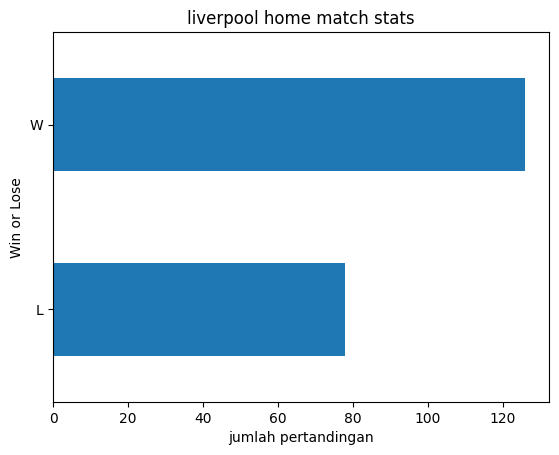

In [229]:
home = df.filter(regex='home')
home.loc[df["home_team"] == 'Liverpool','home_win'].value_counts().sort_values().plot(kind='barh',title='liverpool home match stats', xlabel='jumlah pertandingan', ylabel='Win or Lose')

<AxesSubplot: title={'center': 'liverpool away match stats'}, xlabel='jumlah pertandingan', ylabel='Win or Lose'>

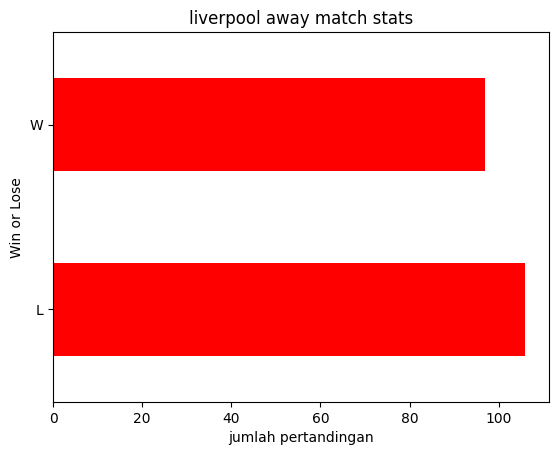

In [230]:
away = df.filter(regex='away')
away.loc[df["away_team"] == 'Liverpool','away_win'].value_counts().sort_values(ascending=False).plot(kind='barh',title='liverpool away match stats', xlabel='jumlah pertandingan', ylabel='Win or Lose', color='red')

In [232]:
liverpool = df.loc[df['home_team'] == 'Liverpool']
liverpool.head()

,home_team,away_team,goal_home_ft,goal_away_ft,home_passes,away_passes,home_possession,away_possession,home_shots,home_shots_on_target,away_shots,away_shots_on_target,home_win,away_win,draw
date,,,,,,,,,,,,,,,
2010-08-15,Liverpool,Arsenal,1,1,303.0,536.0,36.7,63.3,8.0,4.0,17.0,3.0,L,L,W
2010-08-29,Liverpool,West Bromwich Albion,1,0,414.0,402.0,51.0,49.0,11.0,4.0,16.0,3.0,W,L,L
2010-09-25,Liverpool,Sunderland,2,2,412.0,347.0,54.9,45.1,14.0,5.0,10.0,3.0,L,L,W
2010-10-03,Liverpool,Blackpool,1,2,498.0,391.0,56.8,43.2,23.0,8.0,15.0,7.0,L,W,L
2010-10-24,Liverpool,Blackburn Rovers,2,1,411.0,311.0,57.3,42.7,20.0,8.0,7.0,1.0,W,L,L
